# Importar Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pandas_profiling import ProfileReport
from sklearn.compose import make_column_selector,ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


# Análisis Exploratorio

In [42]:
offers= pd.read_csv("C:/Users/Sebastián/Downloads/offers.csv")
leads= pd.read_csv("C:/Users/Sebastián/Downloads/leads.csv")

In [4]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4962 non-null   object 
 1   Use Case       6093 non-null   object 
 2   Status         6130 non-null   object 
 3   Created Date   6130 non-null   object 
 4   Close Date     6130 non-null   object 
 5   Price          5765 non-null   float64
 6   Discount code  4431 non-null   object 
 7   Pain           5261 non-null   object 
 8   Loss Reason    2364 non-null   object 
dtypes: float64(1), object(8)
memory usage: 431.1+ KB


In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61639 entries, 0 to 61638
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Id                          43972 non-null  object
 1   First Name                  53240 non-null  object
 2   Use Case                    44918 non-null  object
 3   Source                      60293 non-null  object
 4   Status                      61639 non-null  object
 5   Discarded/Nurturing Reason  45169 non-null  object
 6   Acquisition Campaign        25047 non-null  object
 7   Created Date                61639 non-null  object
 8   Converted                   61639 non-null  int64 
 9   City                        34929 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


In [58]:
leads.sample(20)

,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
36560,y2gejf8l,Robin19 Smith8,Corporate Events,Outbound,Discarded,Not Target,TradeShow,2019-06-25,0,San Diego
7567,sy9pulgg,NaN,NaN,Inbound,Nurturing,Not feeling,NaN,2018-03-07,0,San Francisco
3403,7fm18wsm,Charlie4 Martinez20,Corporate Events,Inbound,Discarded,Not the right moment,NaN,2018-10-06,0,NaN
42400,NaN,Taylor20 Taylor11,Corporate Events,Inbound,Nurturing,Not feeling,June Launch,2019-08-12,0,San Francisco
5820,lgqkhm55,Devon8 Smith20,Educational Seminars,Inbound,Nurturing,Competitor,NaN,2018-06-21,0,San Francisco
32823,3hxph0bq,Robin5 Anderson12,NaN,Inbound,Nurturing,Unreachable,NaN,2019-05-25,0,NaN
59270,1y2trxxs,Reese8 White3,NaN,Outbound,New,NaN,Corporate Connect,2019-12-24,0,Jacksonville
46906,NaN,NaN,Sports Events,Inbound,Discarded,Not Target,NaN,2019-09-25,0,NaN
3404,2q061sj1,Peyton20 Jackson10,NaN,Inbound,Nurturing,Unreachable,NaN,2019-03-11,0,NaN
34307,zx3cgfi9,Avery2 Moore2,NaN,Outbound,Nurturing,Unreachable,NaN,2019-06-08,0,San Francisco


In [68]:
offers.sample(20)

,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
3258,actfdaol,Sports Events,Closed Lost,2019-04-26,2019-06-26,300.0,NaN,operations,no response
4692,5m5gldg9,Corporate Events,Closed Lost,2019-01-08,2019-01-09,360.0,SAVE25LESS,operations,no product fit
5714,d4bsqkru,Sports Events,Closed Lost,2019-10-29,2019-03-09,360.0,NOCOSTREG,operations,lost to competitor
196,hyizcxnw,Corporate Events,Demo 1,2019-11-11,2020-01-26,NaN,NaN,NaN,NaN
278,ishr0amg,Wedding Planning,Demo 1,2019-11-25,2020-01-26,NaN,NaN,NaN,NaN
2529,nh1ip7h0,Corporate Events,Closed Won,2019-02-03,2019-02-03,768.0,2SEMESTERS20OFF,operations,NaN
1378,tqvjdhyb,Corporate Events,Closed Won,2018-04-03,2018-10-03,360.0,MONTHSAVE25DEAL,financial control,NaN
1602,2ib10nk2,Corporate Events,Checkbox,2019-04-20,2019-04-21,240.0,DISCOUNT50POWER,operations,NaN
258,qcsguhqf,Educational Seminars,Demo 1,2019-11-17,2020-01-26,NaN,NaN,operations,NaN
3437,uzq7wuhi,Educational Seminars,Closed Won,2018-10-22,2018-10-22,240.0,SAVEMONTH50G,operations,NaN


In [43]:
leads.dropna(subset=['Id'], inplace=True)
offers.dropna(subset=['Id'], inplace=True)
df=leads.merge(offers, how='left', on='Id')

In [44]:
df=df.rename(
    columns={
        'Use Case_x':'Use Case Lead',
        'Status_x':'Status Lead',
        'Created Date_x':'Created Date Lead',
        'Use Case_y':'Use Case Offer',
        'Status_y':'Status Offer',
        'Created Date_y':'Created Date Offer'
    }
)
df.head()

,Id,First Name,Use Case Lead,Source,Status Lead,Discarded/Nurturing Reason,Acquisition Campaign,Created Date Lead,Converted,City,Use Case Offer,Status Offer,Created Date Offer,Close Date,Price,Discount code,Pain,Loss Reason
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,vwm9vcdc,Harper11 Johnson11,NaN,Inbound,Nurturing,Not the right moment,NaN,2019-03-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,kbfjr4vz,Drew6 Taylor17,NaN,Inbound,Nurturing,Not feeling,NaN,2019-03-29,0,Denver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype(str)
#df=df.drop(columns=['Created Date Lead','Created Date Offer','Close Date'])
X = df.drop('Status Offer', axis=1)
y = df['Status Offer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.to_csv('C:/Users/Sebastián/OneDrive/Desktop/data_original.csv')

In [45]:
df['Created Date Lead'] = pd.to_datetime(df['Created Date Lead'])
df['Close Date'] = pd.to_datetime(df['Close Date'])
df['Duration'] = (df['Close Date'] - df['Created Date Lead']).dt.days
df['Duration']=df['Duration'].fillna(0)
df['Price']=df['Price'].fillna(0)
df['DiscountCodeFlag'] = np.where(df['Discount code'].notna(), 1, 0)
df['Use Case Offer'] = np.where(df['Use Case Offer'].notna(),df['Use Case Offer'], 'NA')
df['Use Case Lead'] = np.where(df['Use Case Lead'].notna(),df['Use Case Lead'], 'NA')



categorical_columns = ['Use Case Lead', 'Source', 'City', 'Pain', 'Use Case Offer']
df = pd.get_dummies(df, columns=categorical_columns)

df['Target'] = df['Status Offer'].apply(lambda x: 1 if x == 'Closed Won' else 0)

columns_to_drop = ['First Name', 'Discarded/Nurturing Reason', 'Acquisition Campaign', 'Converted', 'Status Offer','Discount code', 'Status Lead',
                   'Id', 'Loss Reason']
df.drop(columns=columns_to_drop, inplace=True)
df.sample(10)

,Created Date Lead,Created Date Offer,Close Date,Price,Duration,DiscountCodeFlag,Use Case Lead_Concerts and festivals,Use Case Lead_Corporate Events,Use Case Lead_Educational Seminars,Use Case Lead_NA,...,Pain_operations,Pain_quality of delivery,Pain_time saving,Use Case Offer_Concerts and festivals,Use Case Offer_Corporate Events,Use Case Offer_Educational Seminars,Use Case Offer_NA,Use Case Offer_Sports Events,Use Case Offer_Wedding Planning,Target
22993,2018-10-14,NaN,NaT,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
21848,2019-01-29,NaN,NaT,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26889,2019-05-02,NaN,NaT,0.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
40996,2019-12-12,NaN,NaT,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
12283,2019-11-29,NaN,NaT,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30995,2019-09-04,NaN,NaT,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7444,2018-12-15,NaN,NaT,0.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9535,2019-03-27,NaN,NaT,0.0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
11284,2019-01-09,NaN,NaT,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17472,2018-09-10,2018-09-11,2018-09-12,200.0,2.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [93]:
profile = ProfileReport(df, title="Análisis Explorativo", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype(str)
df=df.drop(columns=['Created Date Lead','Created Date Offer','Close Date'])
X = df.drop('Target', axis=1)
y = df.loc[:,'Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.base import BaseEstimator, TransformerMixin

categorical_selector = df.select_dtypes(include=['object']).columns.tolist()
numerical_selector = df.select_dtypes(include=['int', 'float']).columns.tolist()


index_to_remove = numerical_selector.index('Target')


numerical_selector.pop(index_to_remove)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_selector),
        ('cat', categorical_transformer, categorical_selector)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price', 'Duration',
                                                   'DiscountCodeFlag']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8434
           1       0.92      0.99      0.96       366

    accuracy                           1.00      8800
   macro avg       0.96      1.00      0.98      8800
weighted avg       1.00      1.00      1.00      8800



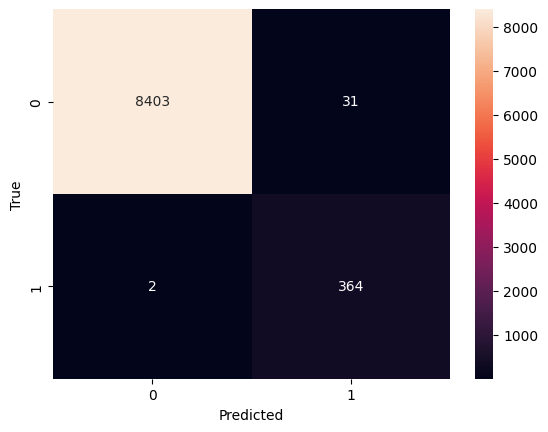

In [11]:
y_pred = pipeline.predict(X_test)
#modelo_base= pipeline.fit(X_train, y_train)
# Reportar métricas de error
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Definir los parámetros a buscar para cada modelo
param_grid = [
    {
        'classifier': [XGBClassifier(class_weight='balanced')],
        'classifier__n_estimators': [300, 400, 500, 600],
        'classifier__max_depth': [5, 8, 10, 12],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2]
    },
    {
        'classifier': [RandomForestClassifier(class_weight='balanced')],
        'classifier__n_estimators': [300, 400, 500, 600],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__max_depth': [15, 20, 25, 30],
        'classifier__min_samples_split': [2, 5, 8, 10],
        'classifier__min_samples_leaf': [1, 3, 5, 7]
    },
    {
        'classifier': [LGBMClassifier(class_weight='balanced')],
        'classifier__n_estimators': [300, 400, 500, 600],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2]
    }
]


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())  
])

grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='precision', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Mejor modelo:", grid_search.best_estimator_)
print("Mejores parámetros:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 592 candidates, totalling 1184 fits


[08:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.



Mejor modelo: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price', 'Duration',
                                                   'DiscountCodeFlag']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(han

In [118]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8434
           1       0.91      0.97      0.94       366

    accuracy                           0.99      8800
   macro avg       0.96      0.98      0.97      8800
weighted avg       1.00      0.99      0.99      8800



In [119]:
grid_search.best_estimator_


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price', 'Duration',
                                                   'DiscountCodeFlag']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Id', 'Use Case Offer...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=600, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [120]:
import joblib
joblib.dump(grid_search.best_estimator_, "C:/Users/Sebastián/OneDrive/Desktop/lead_classification_v2.joblib")


['C:/Users/Sebastián/OneDrive/Desktop/lead_classification_v2.joblib']

In [124]:
modelo_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Price', 'Duration',
                                                   'DiscountCodeFlag']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Id', 'Use Case Offer...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=12, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=600, n_jobs=None,
                               num_parallel_tree=None, ...))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8434
           1       0.93      1.00      0.96       366

    accuracy                           1.00      8800
   macro avg       0.96      1.00      0.98      8800
weighted avg       1.00      1.00      1.00      8800



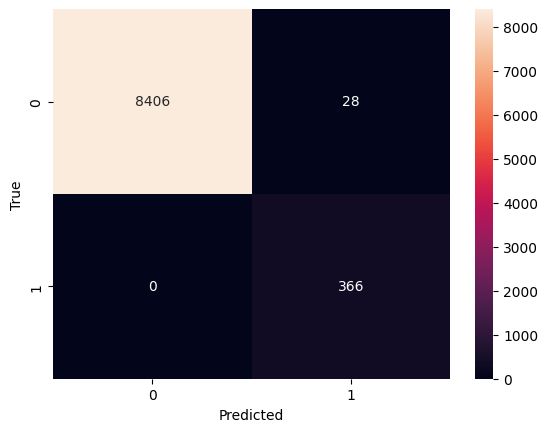

In [125]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
import shap 
from xgboost import XGBClassifier


rf=XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None)
rf=rf.fit(X_train,y_train)



explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

#shap.summary_plot(shap_values, X_train)


[03:57:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

[03:57:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [49]:
shap_summary = pd.DataFrame(shap_values, columns=X_train.columns)

# Summarize SHAP values (e.g., mean absolute value for each feature)
shap_summary_abs = shap_summary.mean().sort_values(ascending=False).reset_index()
shap_summary_abs.columns = ['Feature', 'SHAP Value']

In [52]:
shap_summary_abs.to_csv('c:/Users/Sebastián/OneDrive/Desktop/shap.csv', index=False)